In [2]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit
#import statsmodels.api as sm

#my modules
from src.env import user, password, CodeUp_sql_server
import src.time_series_acquire as ac
# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)

## Exercise

Do your work for this exercise in a notebook named explore.ipynb. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

Note: When resampling data, use a mean() aggregation method.

Store Item Demand
Load your store item demand data using your acquire and/or prepare functions.

Using a human-based approach, split your dataset into train and test sets.
Visualize your train-test split.
Only use your train data set to perform the following tasks:

Resample your data and visualize it.
Creating a rolling (moving) average of your data and visualize it.
Plot the difference in sales from one day to the next.
Plot the % difference in sales from one day to the next.
Plot the % difference in sales from one week to the next.
Plot the % difference in sales from one month to the next.
Visualize an autocorrelation plot on a weekly resampling.
Visualize a seasonal decomposition plot on a weekly resampling.
OPS data
Load your OPS data using your acquire and/or prepare functions.

Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test.
Only use the train data set to perform the following tasks:

Visualize your train-test split.
Plot the consumption, wind, and solar data on the same chart.
Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.
Resample the consumption data to monthly and plot it.
Resample the consumption data to yearly and plot it.

In [10]:
df = ac.get_store_df()
df.head(2)

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16


In [11]:
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [12]:
#splitting data for learning

train = df[:'2016']
test = df[:'2017']

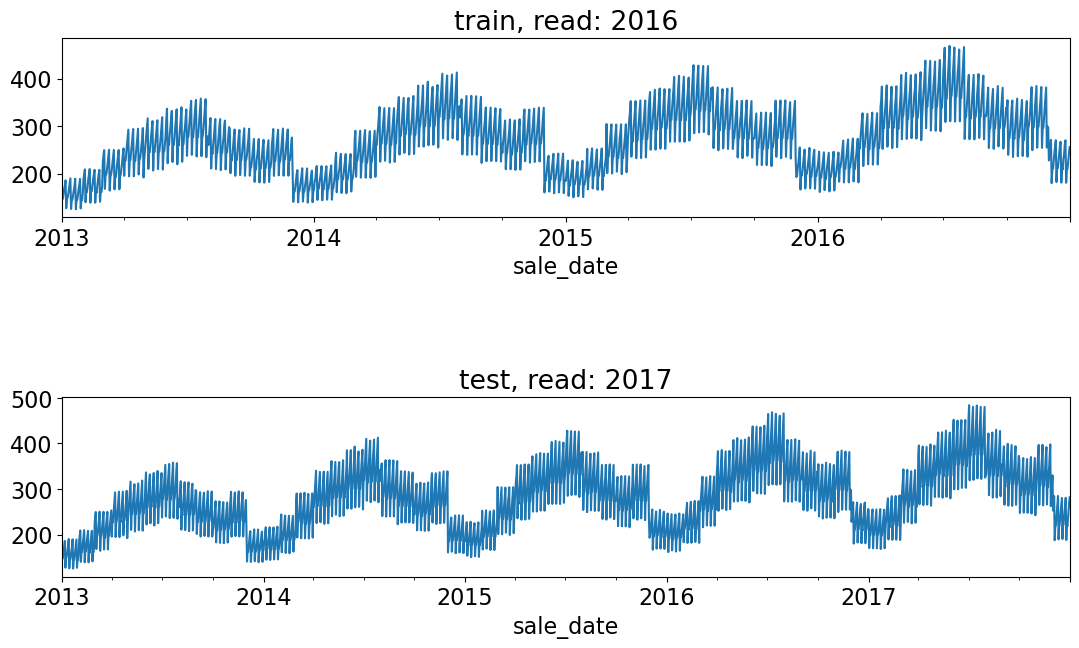

In [17]:
# vizualize the split data:
plt.subplot(211)
train.resample('D').sales_total.mean().plot()
plt.title('train, read: 2016')
plt.subplot(212)
test.resample('D').sales_total.mean().plot()
plt.title('test, read: 2017')
plt.subplots_adjust(hspace=1)
plt.show()

In [19]:
# y is the resample daily data:

y = train.resample('D').sales_total.mean()
y.head()

sale_date
2013-01-01    147.68802
2013-01-02    147.14116
2013-01-03    156.33896
2013-01-04    168.93546
2013-01-05    175.24370
Freq: D, Name: sales_total, dtype: float64

<div class='alert alert-block alert-info'>
    <h2> Plotting weekly average and the 7-day moving average. Compare the 2 plots </h2>
    </div>

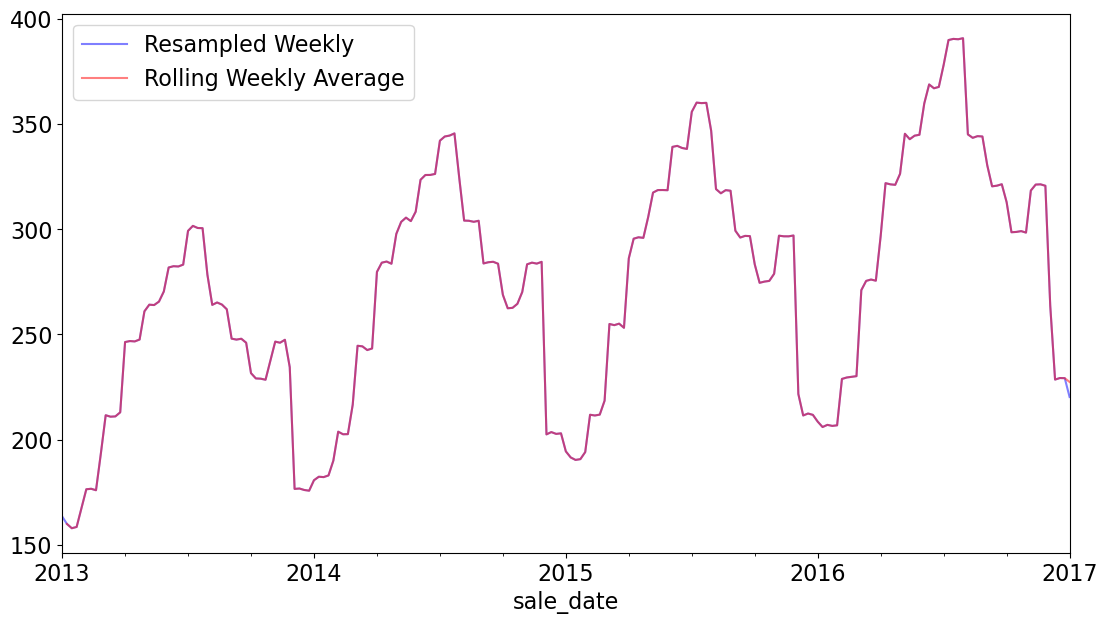

In [20]:
y.resample('W').mean().plot(label='Resampled Weekly', alpha=.5, color = 'blue')
y.rolling(7).mean().plot(label='Rolling Weekly Average',alpha=0.5, color = 'red')
plt.legend()

Text(0, 0.5, 'Difference in sales from one day to the next')

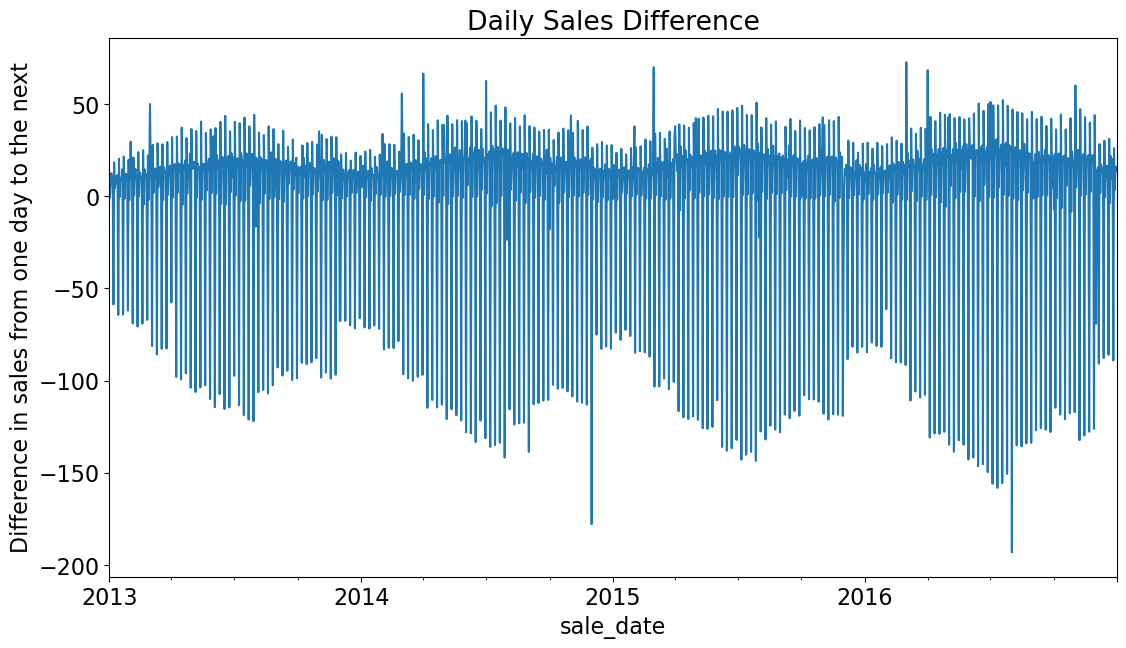

In [21]:
# Plot the daily difference. 
# Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

y.diff().plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference in sales from one day to the next')

Text(0, 0.5, '% Change')

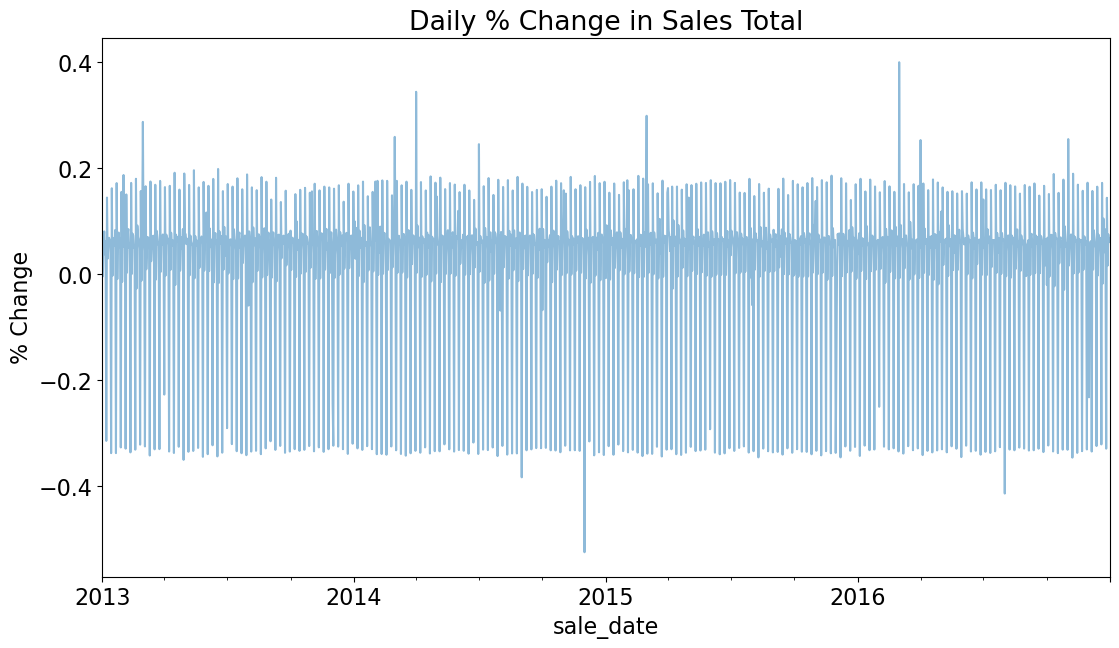

In [22]:
# Maybe it would be helpful to look at percent change as well:

(y.diff() / y.shift()).plot(alpha=.5)
plt.title('Daily % Change in Sales Total')
plt.ylabel('% Change')

<div class='alert alert-block alert-info'>
    <h2> Taking a look at week over week and month over month </h2>
    </div>

[Text(0.5, 1.0, 'Monthly % Change in Sales Total')]

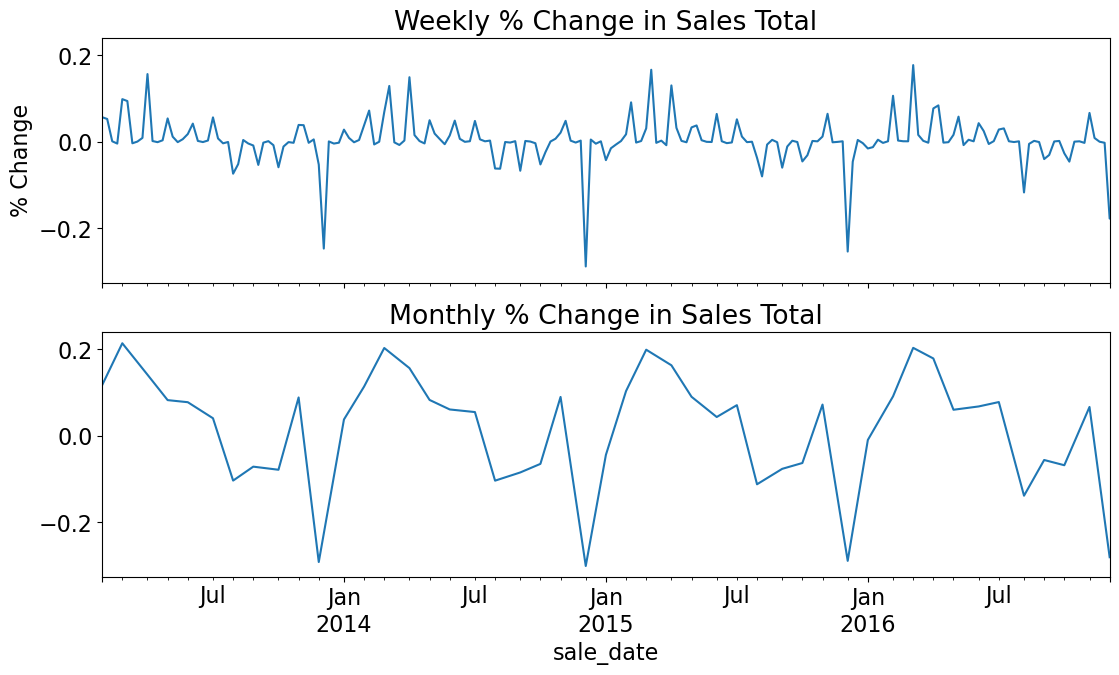

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax2)
ax2.set(title='Monthly % Change in Sales Total')
# ax2.hlines(0, *ax2.get_xlim())